In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

In [4]:
data=pd.read_csv("/home/xav/Desktop/CarPre/Dataset/cardekho_dataset.csv")

In [5]:
data.head()

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [5]:
data.isnull().sum()

Unnamed: 0           0
car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

In [6]:
data.columns = data.columns.str.strip()  # removes extra spaces
data.drop("Unnamed: 0", axis=1, inplace=True)


In [6]:
df=data.drop("car_name",axis=1,inplace=False)

In [8]:
df.head()

,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [9]:
df.describe()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


In [10]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15411 non-null  object 
 1   brand              15411 non-null  object 
 2   model              15411 non-null  object 
 3   vehicle_age        15411 non-null  int64  
 4   km_driven          15411 non-null  int64  
 5   seller_type        15411 non-null  object 
 6   fuel_type          15411 non-null  object 
 7   transmission_type  15411 non-null  object 
 8   mileage            15411 non-null  float64
 9   engine             15411 non-null  int64  
 10  max_power          15411 non-null  float64
 11  seats              15411 non-null  int64  
 12  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.5+ MB


In [11]:
df.shape

(15411, 12)

In [12]:
df.nunique() 


brand                  32
model                 120
vehicle_age            24
km_driven            3688
seller_type             3
fuel_type               5
transmission_type       2
mileage               411
engine                110
max_power             342
seats                   8
selling_price        1086
dtype: int64

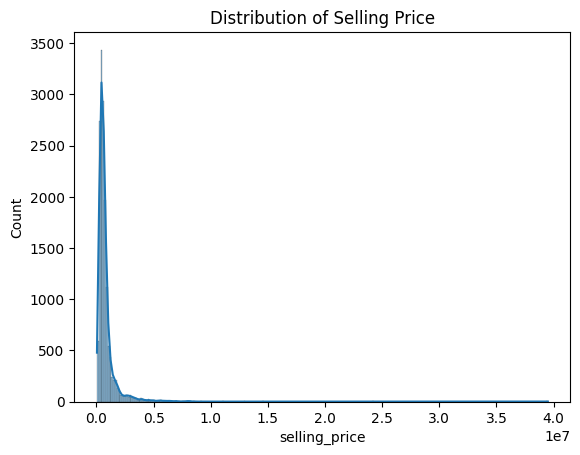

In [10]:
sns.histplot(df['selling_price'], kde=True)
plt.title("Distribution of Selling Price")
plt.savefig("EDA_Plots/selling_price_dist.png") 
plt.show()


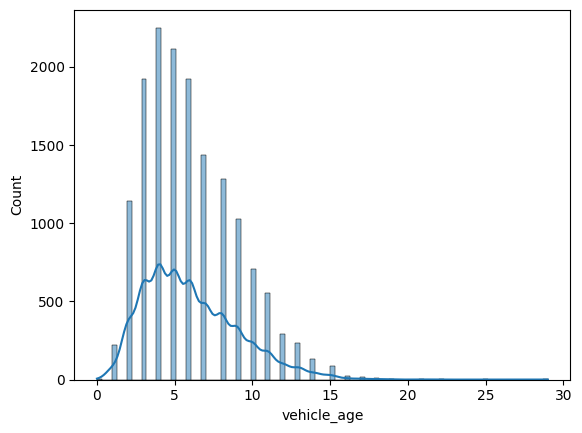

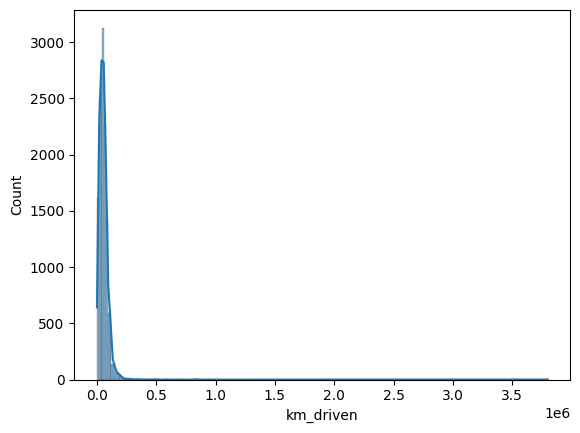

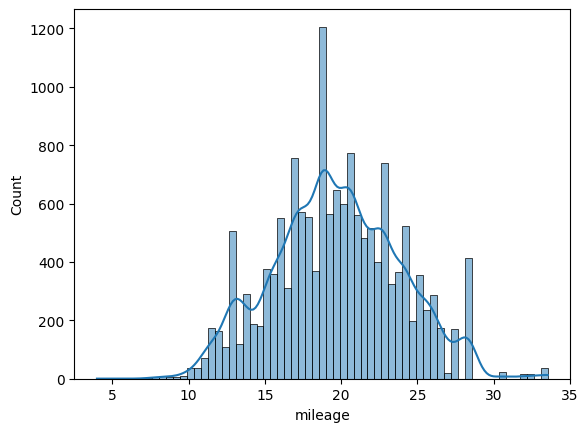

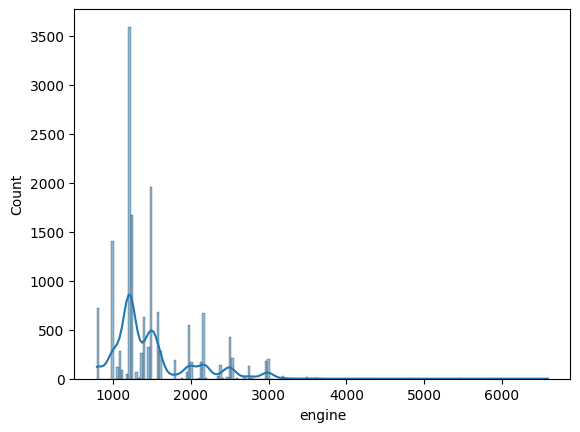

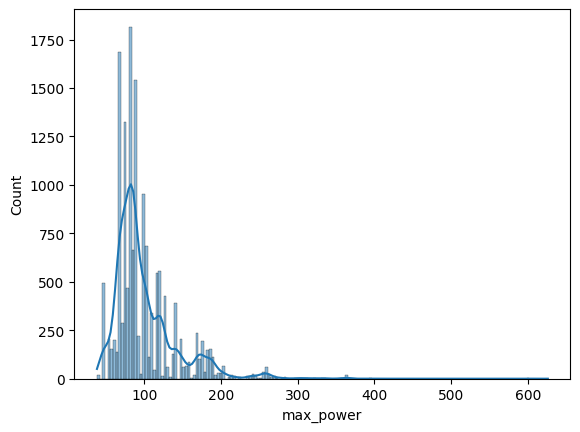

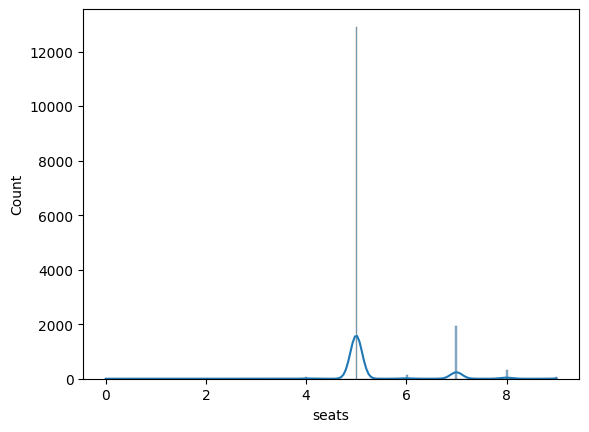

In [46]:
num_cols = ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']
df[num_cols].describe()

for col in num_cols:
    sns.histplot(data[col], kde=True)
    plt.show()


brand
Maruti           4992
Hyundai          2982
Honda            1485
Mahindra         1011
Toyota            793
Ford              790
Volkswagen        620
Renault           536
BMW               439
Tata              430
Mercedes-Benz     337
Skoda             334
Audi              192
Datsun            170
Jaguar             59
Land Rover         51
Jeep               41
Kia                32
Porsche            21
Volvo              20
MG                 19
Mini               17
Nissan             11
Lexus              10
Isuzu               8
Bentley             3
Maserati            2
ISUZU               2
Ferrari             1
Mercedes-AMG        1
Rolls-Royce         1
Force               1
Name: count, dtype: int64


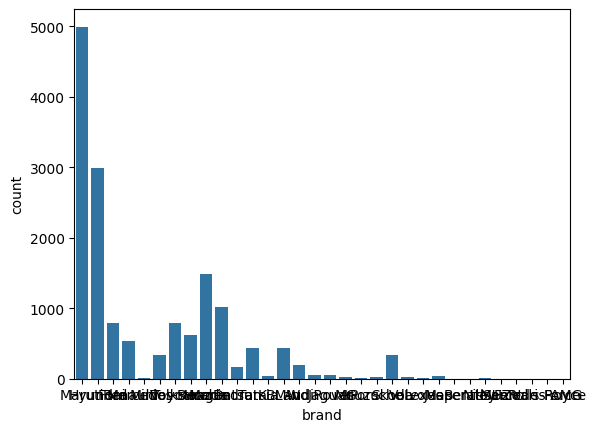

model
i20             906
Swift Dzire     890
Swift           781
Alto            778
City            757
               ... 
Altroz            1
C                 1
Ghost             1
Quattroporte      1
Gurkha            1
Name: count, Length: 120, dtype: int64


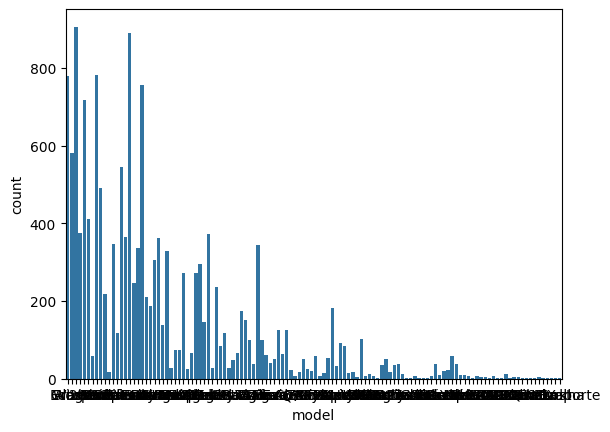

seller_type
Dealer              9539
Individual          5699
Trustmark Dealer     173
Name: count, dtype: int64


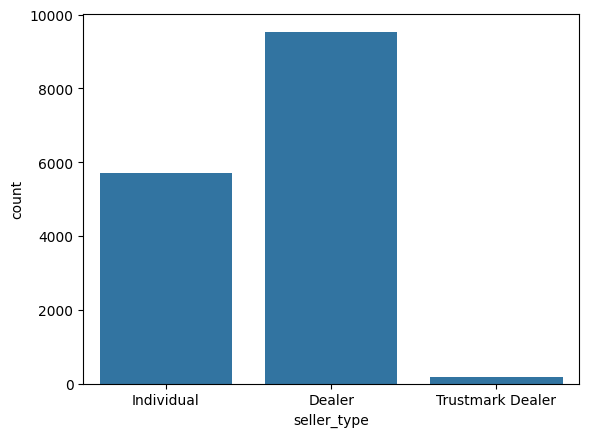

fuel_type
Petrol      7643
Diesel      7419
CNG          301
LPG           44
Electric       4
Name: count, dtype: int64


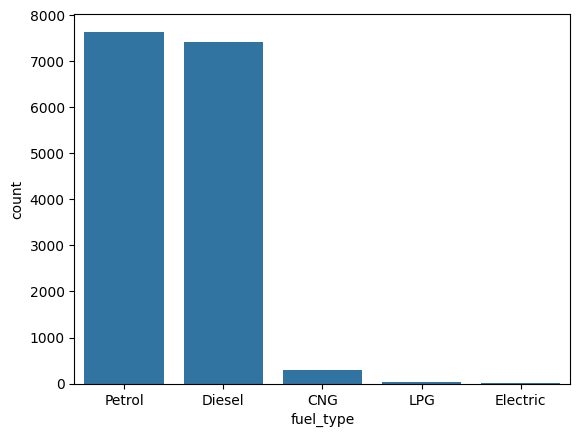

transmission_type
Manual       12225
Automatic     3186
Name: count, dtype: int64


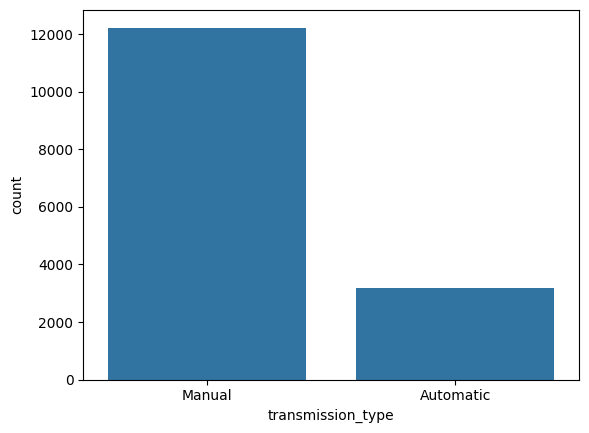

In [47]:
cat_cols = ['brand', 'model', 'seller_type', 'fuel_type', 'transmission_type']
for col in cat_cols:
    print(df[col].value_counts())
    sns.countplot(x=col, data=data)
    plt.show()


<Axes: >

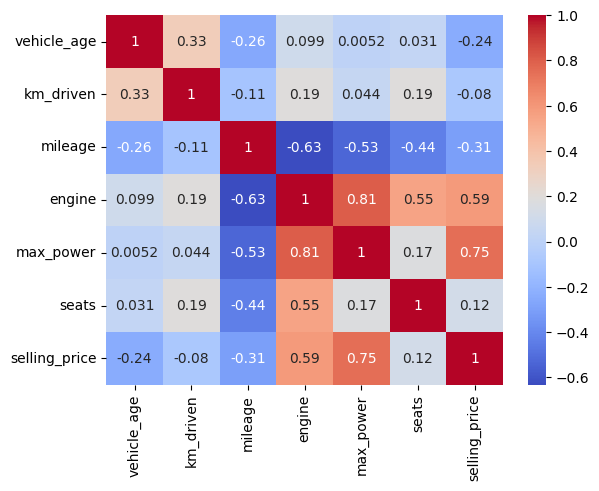

In [16]:
corr = data[num_cols + ['selling_price']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')


In [48]:
X = df.drop('selling_price', axis=1)
y = df['selling_price']

In [49]:
ct = ColumnTransformer([
    ('onehot', OneHotEncoder(handle_unknown='ignore'), cat_cols),
    ('scale', StandardScaler(), num_cols)
])

In [50]:
X = ct.fit_transform(X)

In [51]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [60]:
f_model = RandomForestRegressor(n_estimators=100, random_state=42)


rf_model.fit(X_train, y_train)



,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [61]:
y_pred = rf_model.predict(X_test)

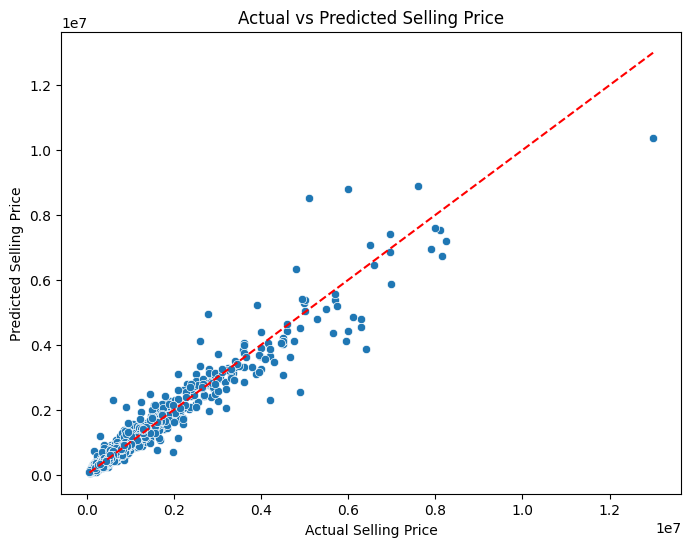

In [62]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Actual vs Predicted Selling Price')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # reference line y=x
plt.show()

In [63]:
print("R²:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))


R²: 0.9390438729919843
RMSE: 45886662430.01595
MAE: 98972.18576061196


In [64]:
print(y_test.dtype)
print(y_test.min(), y_test.max())
print(y_pred.min(), y_pred.max())


int64
60000 13000000
58108.28571428572 10378660.0


In [66]:
import joblib

# Save trained Random Forest model
joblib.dump(rf_model, 'car_rf_model.pkl')

# Save the ColumnTransformer (preprocessor)
joblib.dump(ct, 'preprocessor.pkl')


['preprocessor.pkl']